In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
wine = pd.read_csv("winequality-red.csv", sep = ";")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# find out how many quality groups there are 
quaGrps = wine.groupby(by = ["quality"])
quaGrps.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


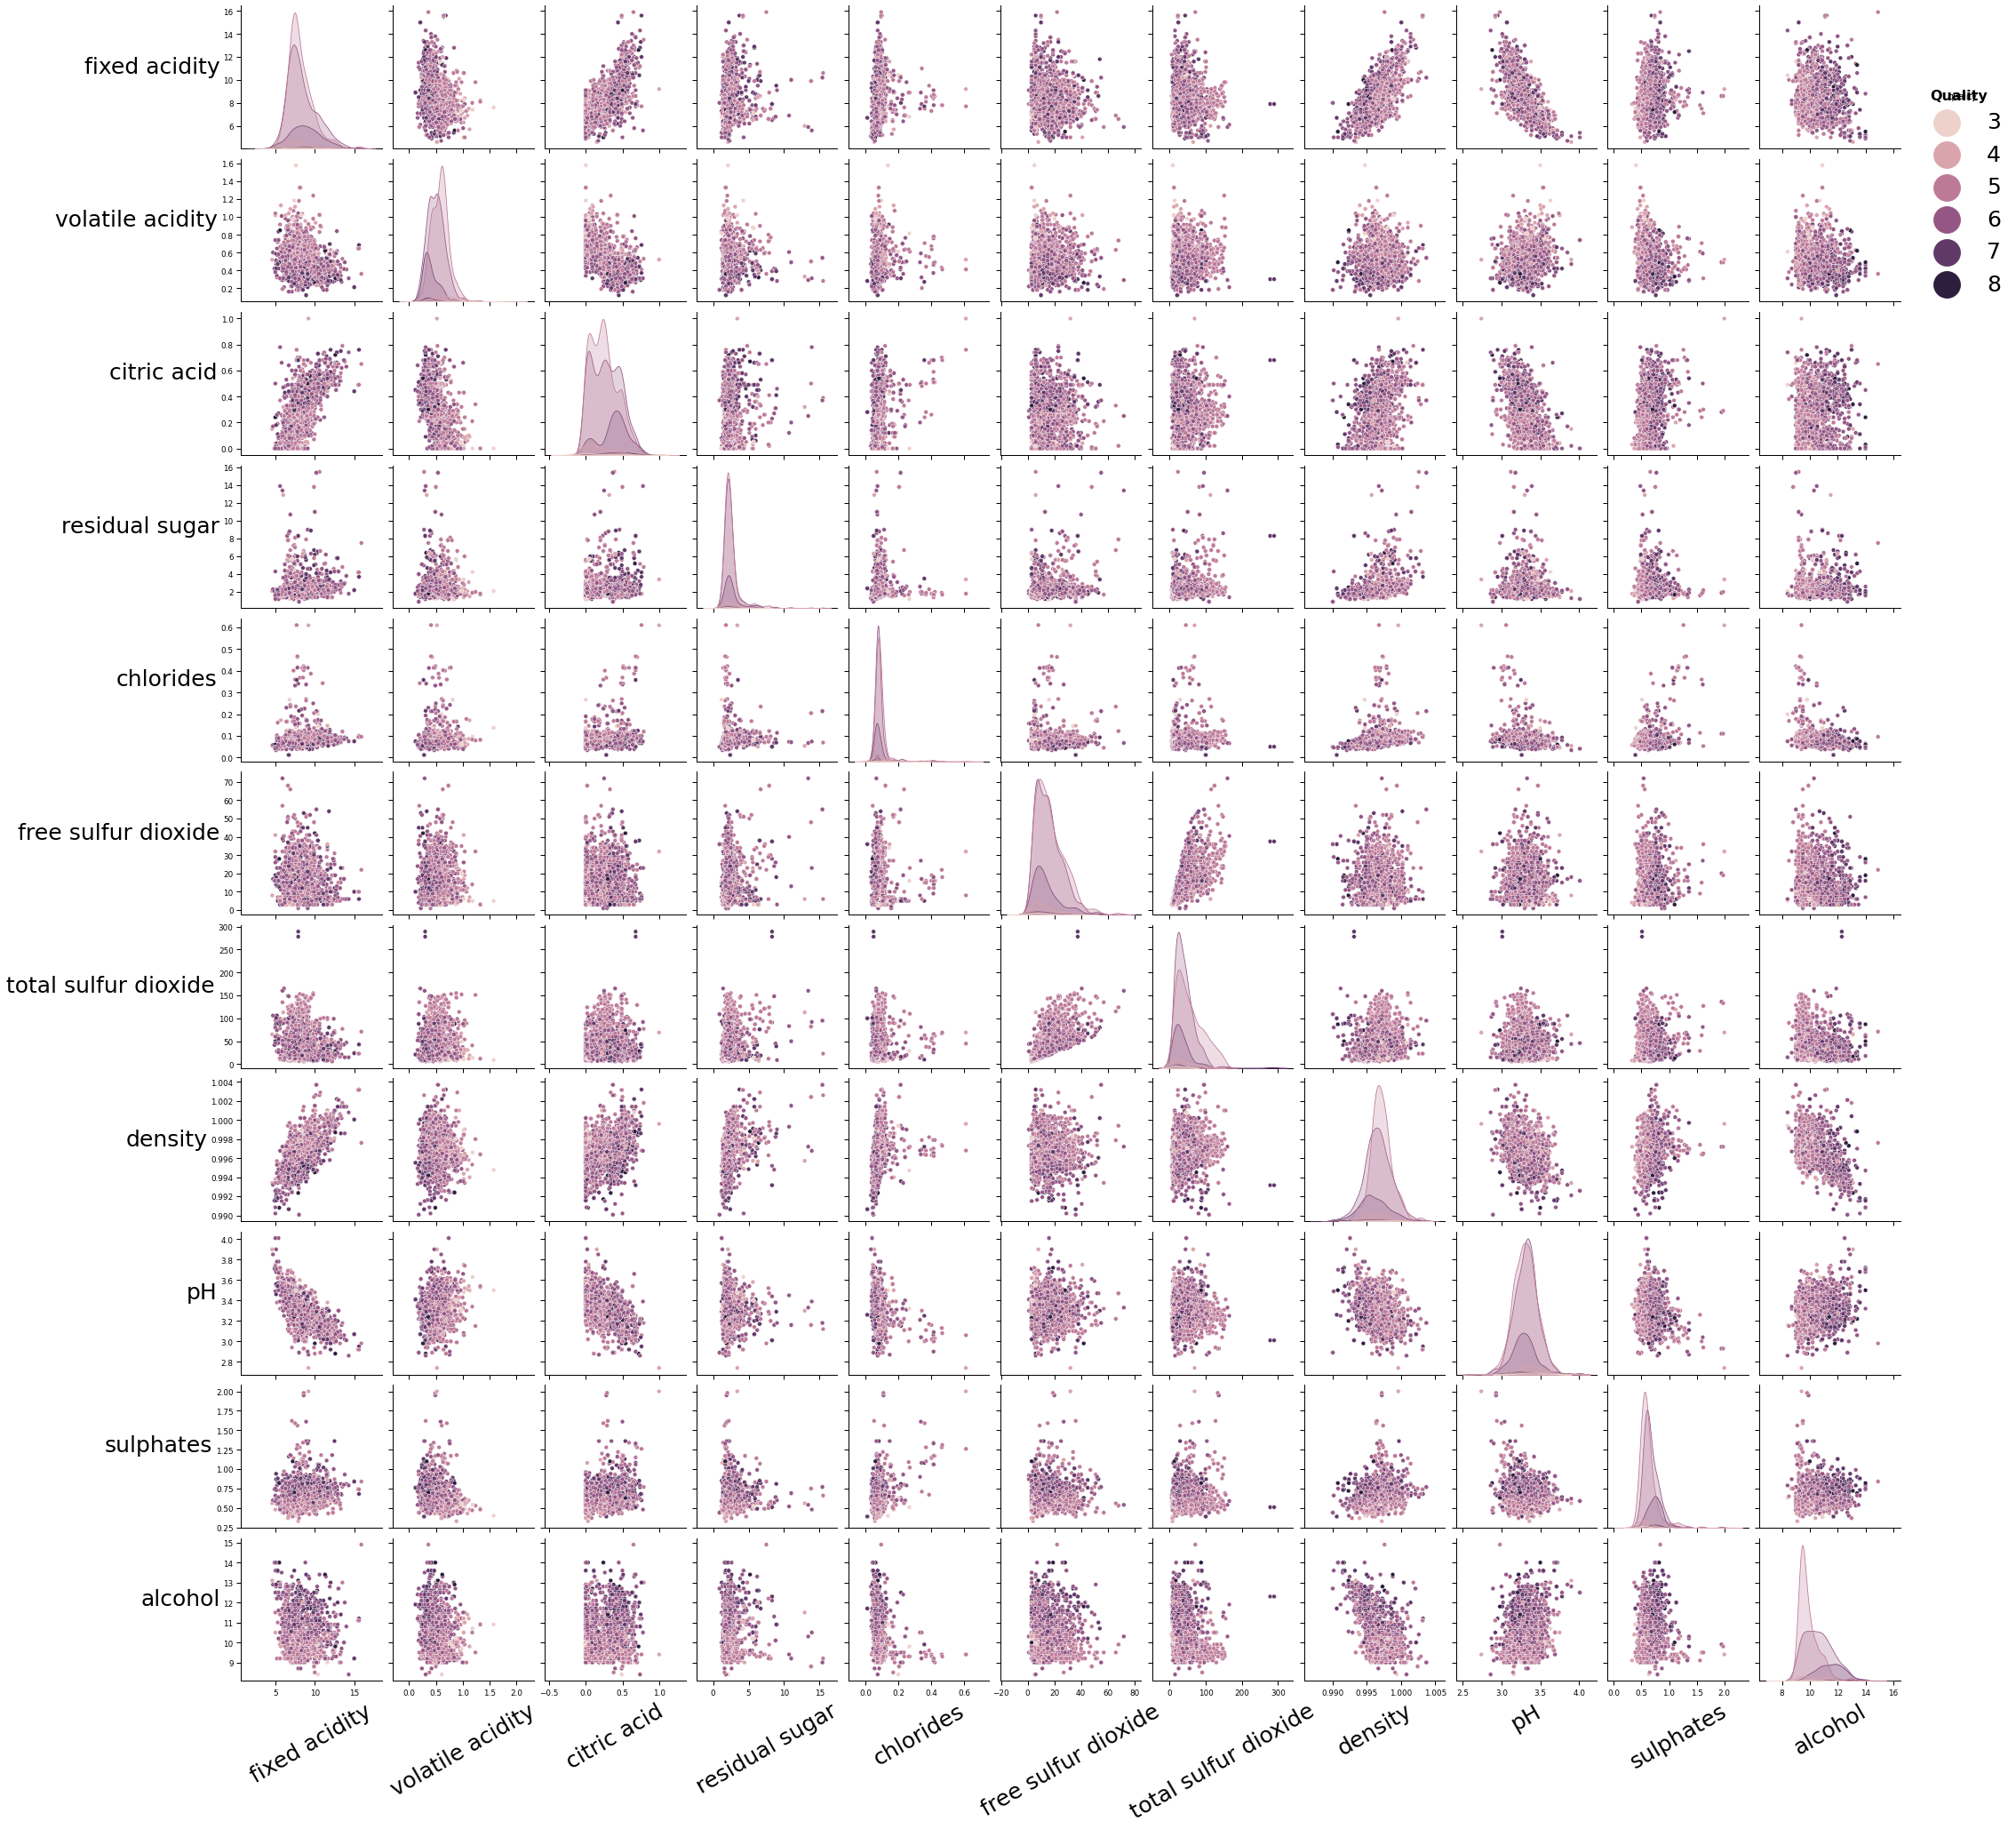

In [9]:
%matplotlib inline
# %matplotlib qt

# pair plot to get a rough idea of how related the features are
# this cell takes long time to run 
pair = sns.pairplot(data = wine, hue = "quality")


#add overall title
pair.fig.suptitle('Quality'.title(), 
                 fontsize = 16, fontweight = "bold", x = 1, y = 0.94)


# set legend label size
plt.rc('legend', fontsize= 25, markerscale = 2.5)


# move legend
sns.move_legend(pair, loc = "upper left", bbox_to_anchor=(0.97, 0.95))

# make the label size on axies bigger
sns.set_context("paper", rc={"axes.labelsize":25})

# change directions of label on axies, to make it more readable
for ax in pair.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 30)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')


plt.show()

In [10]:
# note for the plots:
# splitting by diagonal, the upper part and lower part are basically the same plots, just with x, y flipped. 
# So choose only half to make a presentation, it is easier to cut it out with image software than code

In [11]:
# Questions
# what we can learn from these pair plots? how this can affect the accuracy of diffent models?
# Very few observations are linear correlated, for example, fixed acidity vs density
# from the diagonal plots we can see all the obvervations more or less have a Normal Distribution

In [14]:
#Create features
x = wine.loc[:, "fixed acidity":"alcohol"]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
#creat target
y = wine['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

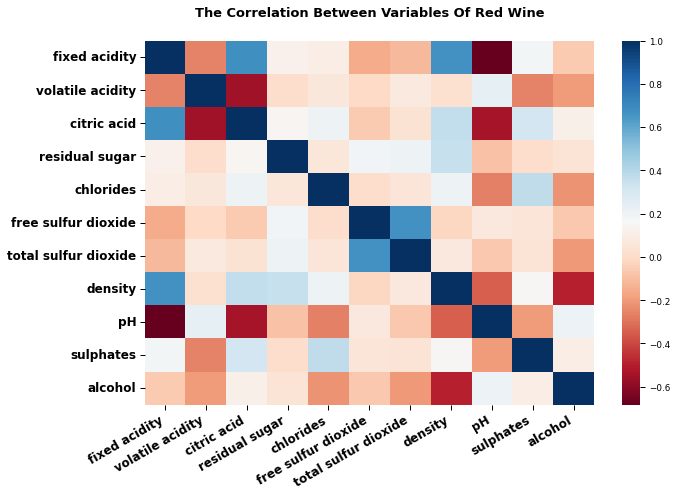

In [16]:
## Heat map to present the correlations between features

correlation = x.corr()

# plot heat map
plt.figure(figsize = (10,7))
sns.heatmap(data = correlation, cmap = "RdBu")

# title
plt.title('the correlation between variables of red wine'.title(), x = 0.5, y = 1.05, 
          fontsize = 13, fontweight = "bold")
# plt.xlabel('Petal Length(cm)', fontsize = 12, fontweight = "bold")
# plt.ylabel('Petal Width(cm)', fontsize = 12, fontweight = "bold")

# set size on x, y-axis label, ha is horizonatal-alignment
plt.xticks(rotation = 30, ha = "right",fontsize = 12, fontweight = "bold")
plt.yticks(fontsize = 12, fontweight = "bold")


plt.tight_layout()
plt.show()

In [ ]:
# what we can see from this plot?
# Confirm the result from pairplot that there are not much correlation between observations

In [ ]:
Machine Learning

In [30]:

# split data into 80% training data, 20% test data, data is shuffled before applying split
trainx, testx, trainy, testy = train_test_split(x, y, train_size = 0.8, random_state = 0)

# standarize data
scaler = StandardScaler()

# fit on training fetures only
scaler.fit(trainx)

# apply transform to both the 
trainx = scaler.transform(trainx)
testx = scaler.transform(testx)


In [24]:
# make an instance of the model
# make the model choose the minimum number of principal components so that 95% of the variance is retained
pca = PCA(0.95)
#n_components = 4
# fitting PCA on trainx only
pca.fit(trainx)

#this can be used after fitting the data, find out how many componets are chosen
k = pca.n_components_

# apply the mapping(transform) to both the training and test features
trainx = pca.transform(trainx)
testx = pca.transform(testx)


In [25]:
# apply model, Logistic Regression
# make an instance of the model
# default solver is slow, so "lbfgs" is chosen, solver = "lbfgs"
logisticRegr = LogisticRegression(solver = "lbfgs")

# training the mode on the data, 
# model is learning relationships between x features and y species(target or lables)
logisticRegr.fit(trainx, trainy)

#Predic the labels of new data, using the information the model learned during the model training process

predicy = logisticRegr.predict(testx)

#check accuracy
accuracy = accuracy_score(testy, predicy)

print("When 0.95 of variance is retained, {} principle components are chosen, the accuracy of Logistic\
Regression after PCA is {:.2f} %.".format(k, accuracy * 100))


When 0.95 of variance is retained, 9 principle components are chosen, the accuracy of LogisticRegression after PCA is 61.88 %.


In [26]:
!pip install xgboost


In [27]:
import xgboost as xgb

In [38]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [40]:
#spliting data into x and y
X = wine.loc[:, "fixed acidity":"alcohol"]
Y = wine['quality']


In [103]:
#splitting into train and test sets
seed = 5
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
Y=le.fit_transform(Y)


In [104]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [106]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [107]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 71.56%


In [ ]:
In this project we worked on studying the quality of the red wine based upon 
various paramenters. In order to study the data we fit two different models that is the 
logistic regression model and the XGBClassifier(the one that was not covered in class.)
The accuracy of LogisticRegression model after PCA was about 61.88 % whereas, the accuracy 
for XGBClassifier was obtained to be 71.56%. With the higher %age of accuracy we 
can conclude that the XGBClassifier model fits perfectly. 